In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
from langchain_community.llms import ollama
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from pydantic import BaseModel, Field
import json


# define state 

In [2]:
class structurestate(BaseModel):
    essay:str =Field(description='It will be text.')
    feedback:str =Field(description='summary of essay in text.')
    score:int =Field(description='score out of 100',ge=0,le=100)


In [3]:
class structurestate(TypedDict):
    essay:str 
    feedback:str 
    score:int 

# define graph

In [4]:
graph=StateGraph(structurestate)

In [5]:
llm_model=ChatOllama(model='llama3')

C:\Users\Ashish\AppData\Local\Temp\ipykernel_8600\2969955315.py:1: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm_model=ChatOllama(model='llama3')


In [6]:
# def read_essay(state:structurestate)->structurestate:
#     with open("essay.txt","r",encoding="utf-8") as f:
#         essay_test=f.read()
#     #state['essay']=essay_test# if state Dict
#     state.essay=essay_test
#     return state

In [7]:
# def SummariseWithLLM(state:structurestate)->structurestate:
#     essay=state['essay']
#     feedback=state['feedback']
#     score=state['score']
#     #parser
#     parser=PydanticOutputParser(pydantic_object=structurestate)
#     #promt
#     promt=PromptTemplate(
#         template=(
#             "write feedback on the essay and score out of 100 and provide feedback.\n"
#             "Essay: {essay}\n\n"
#             "{format_instructions}"
#         ),
#         input_variables=["essay"],   # only "essay" is required
#         partial_variables={          # format_instructions is auto-filled
#             "format_instructions": parser.get_format_instructions()
#         },
#     )
#     llm_model=ChatOllama(model="llama3")
#     chain=LLMChain(prompt=promt,llm=llm_model,output_parser=parser)
#     result=chain.invoke({"essay":essay})
#     feedback_obj = result 
#     feedback=feedback_obj.feedback
#     score=feedback_obj.score
#     return state

In [8]:
def SummariseWithLLM(state: structurestate) -> structurestate:
    prompt = PromptTemplate(
        template=(
            "Write feedback on the essay and give a score out of 100.\n"
            "Essay: {essay}\n\n"
            "Respond in JSON with keys: feedback, score"
        ),
        input_variables=["essay"],
    )

    llm_model = ChatOllama(model="llama3")
    chain = LLMChain(prompt=prompt, llm=llm_model)

    result = chain.invoke({"essay": state["essay"]})
    parsed = json.loads(result["text"])

    state["feedback"] = parsed["feedback"]
    state["score"] = parsed["score"]
    return state

# define node

In [9]:
#graph.add_node("read_essay",read_essay)
graph.add_node("SummariseWithLLM",SummariseWithLLM)

In [10]:
#graph.add_edge(START,'read_essay')
graph.add_edge(START,'SummariseWithLLM')
graph.add_edge('SummariseWithLLM',END)

In [11]:
Workflow=graph.compile()

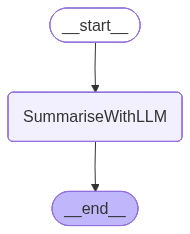

In [12]:
Workflow

In [13]:
essay='''Technology today has become an inseparable part of our daily lives, shaping how we work, learn, communicate, and entertain ourselves. From artificial intelligence and cloud computing to biotechnology and renewable energy, innovations are transforming industries and society at an unprecedented pace.

One of the most influential advancements is artificial intelligence (AI), which powers everything from voice assistants and recommendation systems to autonomous vehicles and medical diagnostics. AI is not only improving efficiency but also enabling solutions to complex global challenges, such as climate change and healthcare accessibility.

Similarly, the rise of 5G and advanced connectivity has accelerated the digital revolution by making information and services accessible in real time, enhancing opportunities for remote work, online education, and telemedicine. Coupled with cloud computing, businesses can now scale faster, innovate more easily, and operate globally with fewer limitations.

However, while technology provides remarkable benefits, it also poses significant challenges. Issues such as data privacy, cybersecurity threats, digital addiction, and the widening digital divide must be carefully managed. Furthermore, the rapid pace of automation raises questions about the future of jobs and the need for continuous reskilling.

In conclusion, today’s technology is a double-edged sword—capable of bringing about tremendous progress but also requiring responsible use and thoughtful governance. If balanced well, it has the power to create a future that is smarter, more sustainable, and inclusive for all.
'''

In [14]:
result = Workflow.invoke({
    "essay": essay,
})

C:\Users\Ashish\AppData\Local\Temp\ipykernel_8600\3195977501.py:12: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=llm_model)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)